## 프로젝트: Coffeeshop Data 분석 및 시각화

### 데이터 불러오기 및 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.stats import shapiro

In [3]:
df = pd.read_excel('./Coffee Shop Sales.xlsx')
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [4]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [61]:
df['product_id'].nunique()

80

In [12]:
df['product_detail'].value_counts()

product_detail
Chocolate Croissant             3076
Earl Grey Rg                    3053
Dark chocolate Lg               3029
Morning Sunrise Chai Rg         3026
Columbian Medium Roast Rg       3013
                                ... 
Jamacian Coffee River            146
Earl Grey                        142
Guatemalan Sustainably Grown     134
Spicy Eye Opener Chai            122
Dark chocolate                   118
Name: count, Length: 80, dtype: int64

In [13]:
df[df.duplicated()]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


In [16]:
df['unit_price'].sort_values()

149115     0.8
101840     0.8
101836     0.8
101822     0.8
101818     0.8
          ... 
29703     45.0
46845     45.0
102858    45.0
71869     45.0
136334    45.0
Name: unit_price, Length: 149116, dtype: float64

### 데이터 요약
- Store: 3개
- Date: 2023년 1월 ~ 6월 
- Time: 오전 6시~ 저녁 9시
- Product Category: 9개
- Product Type: 29개 (syrup, housewares, clothing과 같이 완제품 식품이 아닌 항목도 product type으로 확인됨)
- Product ID: 80개 (1~87로 예상했지만, 62,66,67,68,80,85,86 7개 ID는 매출 발생 없음)
- Product Detail: 80개
- Product Name: ID+Type+Detail = 80개 (동일한 제품에 Product ID가 다르게 표시되는 경우가 있는 것으로 보임.)
- 중복 없음
- 결측치 없음
- 이상치 없음

### 데이터 분석 목적   
Coffeshop Brand 데이터팀의 반기 분석 보고 자료 작성
- 매장별 매출 비교
- 카테고리 매출 순위
- 제품 매출 순위(top 10)
- 월별 매장별 매출 추이
- 월별 카테고리별 매출 추이
- 지점의 위치별 시간대별 상품 판매율 

커피브랜드 운영 회사 분기보고서 보고 항목 참조   

### 데이터 편집
- sales 컬럼 추가

In [18]:
df['sales'] = df['transaction_qty'] * df['unit_price']
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0


- product_name 컬럼 추가 & Rg Lg와 같은 사이즈 표시 삭제 product_name_g 컬럼 추가

In [57]:
df['product_name'] = df['product_id'].apply(str) + ' - ' + df['product_type'] + ' - ' + df['product_detail']

In [69]:
df['product_name_g'] = df['product_name_g'].replace(' Rg', '', regex=True)
df['product_name_g'] = df['product_name_g'].replace(' Sm', '', regex=True)
df['product_name_g'] = df['product_name_g'].replace(' Lg', '', regex=True)

In [70]:
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,product_name,product_name_g
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,32 - Gourmet brewed coffee - Ethiopia Rg,32 - Gourmet brewed coffee - Ethiopia
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,57 - Brewed Chai tea - Spicy Eye Opener Chai Lg,57 - Brewed Chai tea - Spicy Eye Opener Chai
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,59 - Hot chocolate - Dark chocolate Lg,59 - Hot chocolate - Dark chocolate


- 월 컬럼 추가

In [163]:
df['month'] = df['transaction_date'].dt.to_period('M')  # 그래프 성격에 따라 df 또는 df2(period가 아닌 dt.month로 숫자형 변환한 df) 사용
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,product_name,product_name_g,month
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,32 - Gourmet brewed coffee - Ethiopia Rg,32 - Gourmet brewed coffee - Ethiopia,2023-01
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,57 - Brewed Chai tea - Spicy Eye Opener Chai Lg,57 - Brewed Chai tea - Spicy Eye Opener Chai,2023-01
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,59 - Hot chocolate - Dark chocolate Lg,59 - Hot chocolate - Dark chocolate,2023-01


In [164]:
df2 = df.copy()
df2['month'] = df2['month'].dt.month

- 시간대 컬럼 추가

In [173]:
df['hour'] = pd.to_datetime(df['transaction_time'], format = '%H:%M:%S')
df['hour'] = df['hour'].dt.hour
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,product_name,product_name_g,month,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,32 - Gourmet brewed coffee - Ethiopia Rg,32 - Gourmet brewed coffee - Ethiopia,2023-01,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,57 - Brewed Chai tea - Spicy Eye Opener Chai Lg,57 - Brewed Chai tea - Spicy Eye Opener Chai,2023-01,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,59 - Hot chocolate - Dark chocolate Lg,59 - Hot chocolate - Dark chocolate,2023-01,7


### 1. 매장별 매출 비교

In [20]:
store_rank = df.groupby('store_location')['sales'].sum().sort_values(ascending=False)

In [28]:
store_rank_df = pd.DataFrame(store_rank).reset_index()
store_rank_df

,store_location,sales
0,Hell's Kitchen,236511.17
1,Astoria,232243.91
2,Lower Manhattan,230057.25


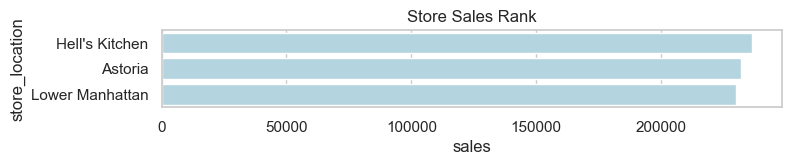

In [201]:
plt.figure(figsize=(8,1))
sns.set_theme(style="whitegrid") 
bars = sns.barplot(store_rank_df, y = 'store_location', x = 'sales', color='lightblue')
plt.title('Store Sales Rank')
plt.show()

### 2. 카테고리별 매출 순위

In [24]:
category_rank = df.groupby('product_category')['sales'].sum().sort_values(ascending=False)

In [38]:
category_rank_df = pd.DataFrame(category_rank).reset_index()
category_rank_df

,product_category,sales
0,Coffee,269952.45
1,Tea,196405.95
2,Bakery,82315.64
3,Drinking Chocolate,72416.00
4,Coffee beans,40085.25
5,Branded,13607.00
6,Loose Tea,11213.60
7,Flavours,8408.80
8,Packaged Chocolate,4407.64


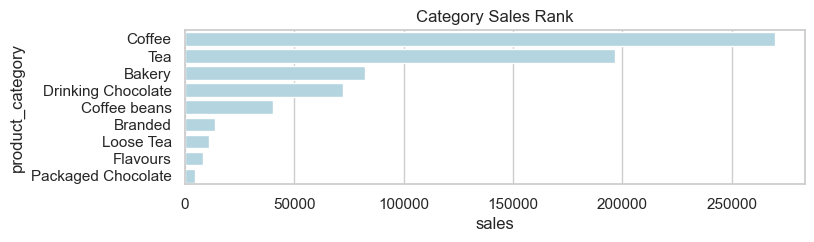

In [42]:
plt.figure(figsize=(8,2))
sns.set_theme(style="whitegrid") 
sns.barplot(category_rank_df, y = 'product_category', x = 'sales', color='lightblue')
plt.title('Category Sales Rank')
plt.show()

### 3. 제품 매출 순위

In [71]:
product_rank = df.groupby('product_name_g')['sales'].sum().sort_values(ascending=False)
product_rank_df = pd.DataFrame(product_rank).reset_index()
product_rank_df_10 = product_rank_df.head(10)
product_rank_df_10

,product_name_g,sales
0,61 - Hot chocolate - Sustainably Grown Organic,21151.75
1,59 - Hot chocolate - Dark chocolate,21006.00
2,39 - Barista Espresso - Latte,19112.25
3,41 - Barista Espresso - Cappuccino,17641.75
4,55 - Brewed Chai tea - Morning Sunrise Chai,17384.00
5,38 - Barista Espresso - Latte,17257.50
6,36 - Premium brewed coffee - Jamaican Coffee R...,16481.25
7,60 - Hot chocolate - Sustainably Grown Organic,16233.75
8,40 - Barista Espresso - Cappuccino,15997.50
9,27 - Organic brewed coffee - Brazilian,15109.50


In [197]:
product_rank = df.groupby('product_name_g')['sales'].sum().sort_values(ascending=True)
product_rank_df = pd.DataFrame(product_rank).reset_index()
product_rank_df_10 = product_rank_df.head(10)
product_rank_df_10

,product_name_g,sales
0,19 - Drinking Chocolate - Dark chocolate,755.20
1,14 - Black tea - Earl Grey,1270.90
2,18 - Chai tea - Spicy Eye Opener Chai,1335.90
3,10 - Green beans - Guatemalan Sustainably Grown,1340.00
4,11 - Herbal tea - Lemon Grass,1360.40
5,12 - Herbal tea - Peppermint,1369.35
6,16 - Chai tea - Traditional Blend Chai,1369.35
7,13 - Black tea - English Breakfast,1440.95
8,15 - Green tea - Serenity Green Tea,1470.75
9,17 - Chai tea - Morning Sunrise Chai,1596.00


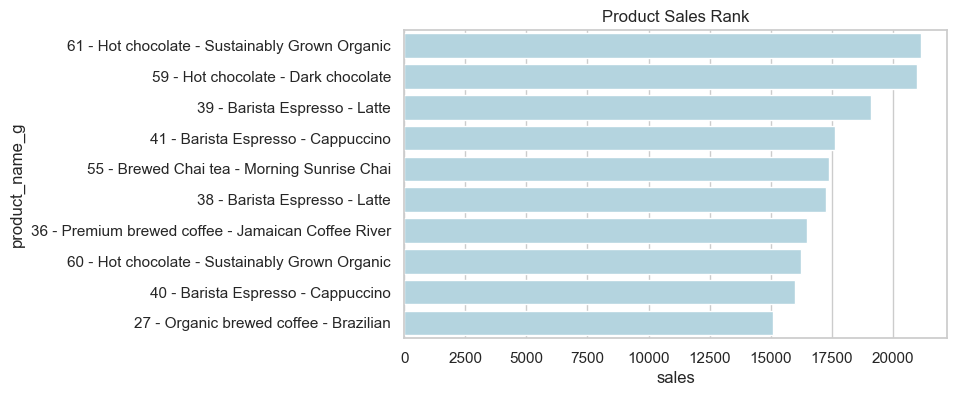

In [72]:
plt.figure(figsize=(7,4))
sns.set_theme(style="whitegrid") 
sns.barplot(product_rank_df_10, y = 'product_name_g', x = 'sales', color='lightblue')
plt.title('Product Sales Rank')
plt.show()

### 4. 월별 매장별 매출 추이

In [89]:
store_month_ = df.groupby(['month', 'store_location'])['sales'].sum()
store_month = pd.DataFrame(store_month_).reset_index()
store_month

,month,store_location,sales
0,2023-01,Astoria,27313.66
1,2023-01,Hell's Kitchen,27820.65
2,2023-01,Lower Manhattan,26543.43
3,2023-02,Astoria,25105.34
4,2023-02,Hell's Kitchen,25719.80
5,2023-02,Lower Manhattan,25320.05
6,2023-03,Astoria,32835.43
7,2023-03,Hell's Kitchen,33110.57
8,2023-03,Lower Manhattan,32888.68
9,2023-04,Astoria,39477.61


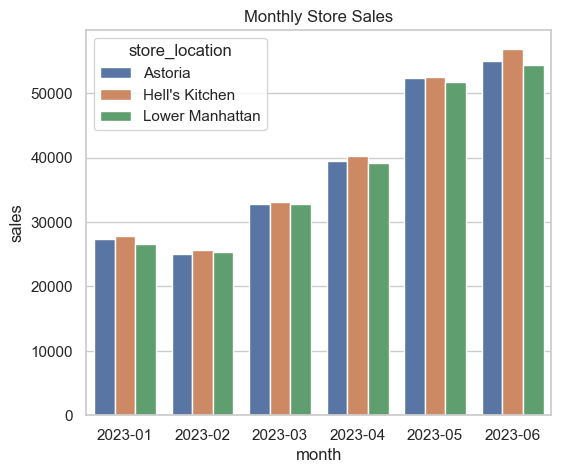

In [103]:
plt.figure(figsize=(6,5))
sns.set_theme(style="whitegrid") 
sns.barplot(store_month, y = 'sales', x = 'month', hue = 'store_location')
plt.title('Monthly Store Sales')
plt.show()

In [ ]:
store_month2 = df2.pivot_table(index='store_location', columns='month', values='sales', aggfunc = 'sum')
store_month2

month,1,2,3,4,5,6
store_location,,,,,,
Astoria,27313.66,25105.34,32835.43,39477.61,52428.76,55083.11
Hell's Kitchen,27820.65,25719.80,33110.57,40304.14,52598.93,56957.08
Lower Manhattan,26543.43,25320.05,32888.68,39159.33,51700.07,54445.69


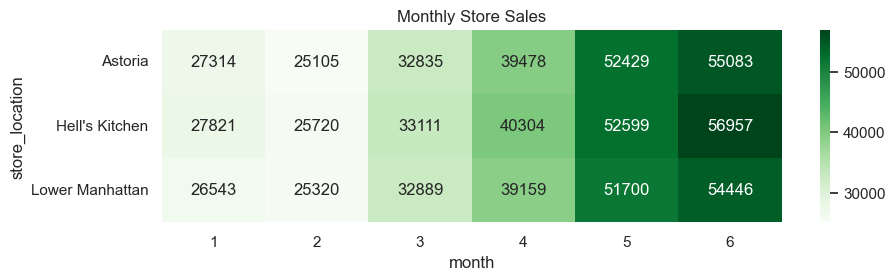

In [141]:
plt.figure(figsize=(10,2.5))
sns.set_theme(style="whitegrid") 
sns.heatmap(store_month2, annot=True, cmap="Greens", fmt=".0f")
plt.title('Monthly Store Sales')
plt.show()

### 5. 월별 카테고리별 매출 추이

In [161]:
category_month_ = df2.groupby(['month', 'product_category'])['sales'].sum()
category_month = pd.DataFrame(category_month_).reset_index()

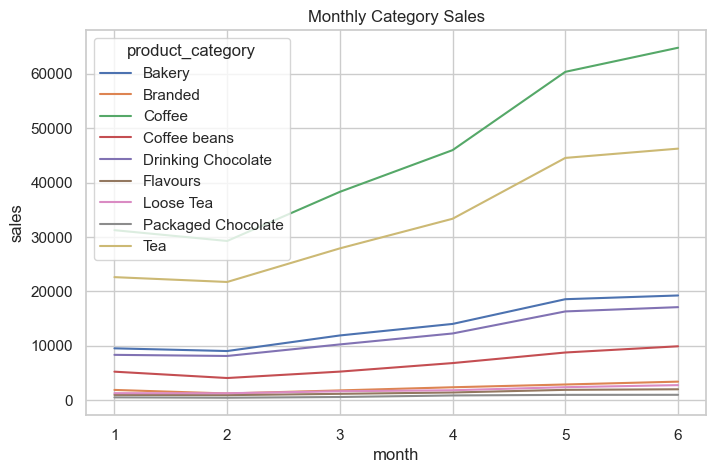

In [162]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid") 
sns.lineplot(data = category_month, x = 'month', y = 'sales', hue = 'product_category')
plt.title('Monthly Category Sales')
plt.show()

### 6.  지점 위치별 시간대별 상품 판매율 

In [178]:
lc_tm_sales_ = df.groupby(['hour', 'store_location'])['sales'].sum()
lc_tm_sales = pd.DataFrame(lc_tm_sales_).reset_index()

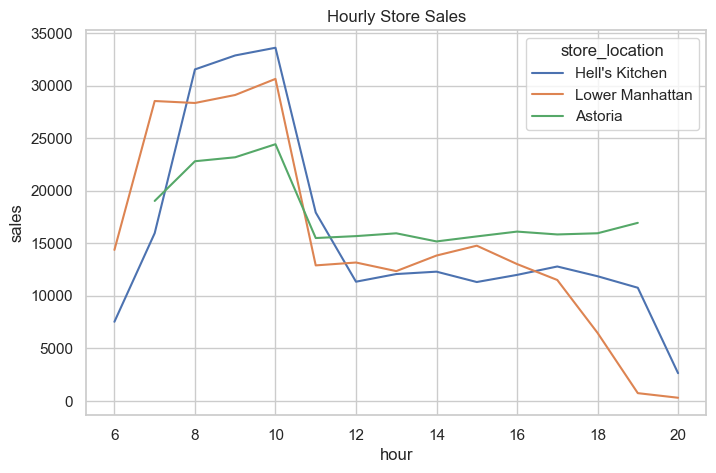

In [179]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid") 
sns.lineplot(data = lc_tm_sales, x = 'hour', y = 'sales', hue = 'store_location')
plt.title('Hourly Store Sales')
plt.show()

In [187]:
lc_tm_sales_2 = df.groupby(['store_location','hour'])['sales'].sum().reset_index()
lc_tm_sales2 = lc_tm_sales_2.pivot(index='store_location', columns='hour', values='sales')

lc_tm_sales2

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
store_location,,,,,,,,,,,,,,,
Astoria,NaN,19028.80,22805.90,23183.57,24426.12,15498.13,15681.20,15947.87,15175.27,15651.95,16110.85,15839.30,15951.30,16943.65,NaN
Hell's Kitchen,7531.17,15961.05,31544.44,32874.29,33605.81,17926.54,11343.10,12070.10,12297.50,11311.25,11990.48,12789.50,11863.21,10766.36,2636.37
Lower Manhattan,14369.10,28536.62,28349.53,29111.67,30641.46,12894.47,13168.49,12349.48,13831.97,14769.90,13021.42,11505.51,6471.69,736.67,299.27


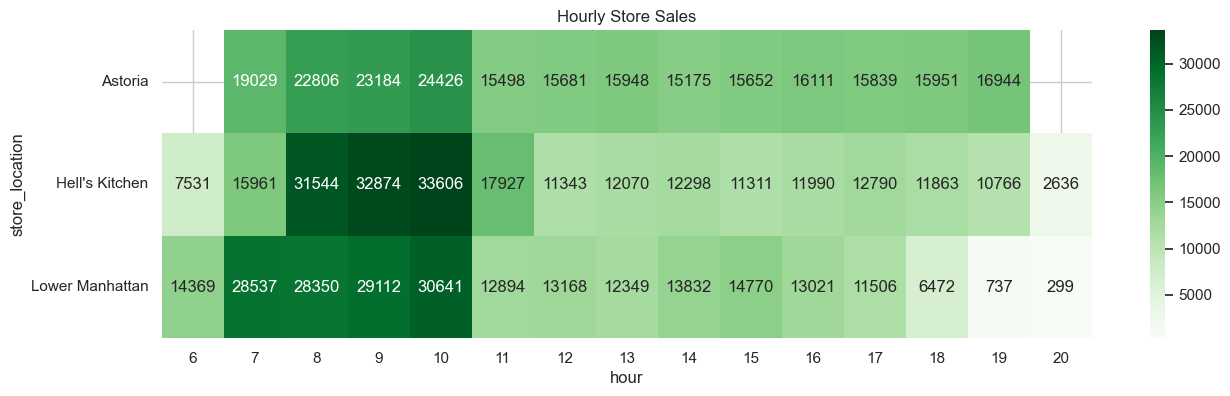

In [203]:
plt.figure(figsize=(15,4))
sns.set_theme(style="whitegrid") 
sns.heatmap(lc_tm_sales2, annot=True, cmap="Greens", fmt=".0f")
plt.title('Hourly Store Sales')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8664\2860378137.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percent = percent_data.applymap(lambda x: f"{x:.1f}%" if pd.notnull(x) else "")


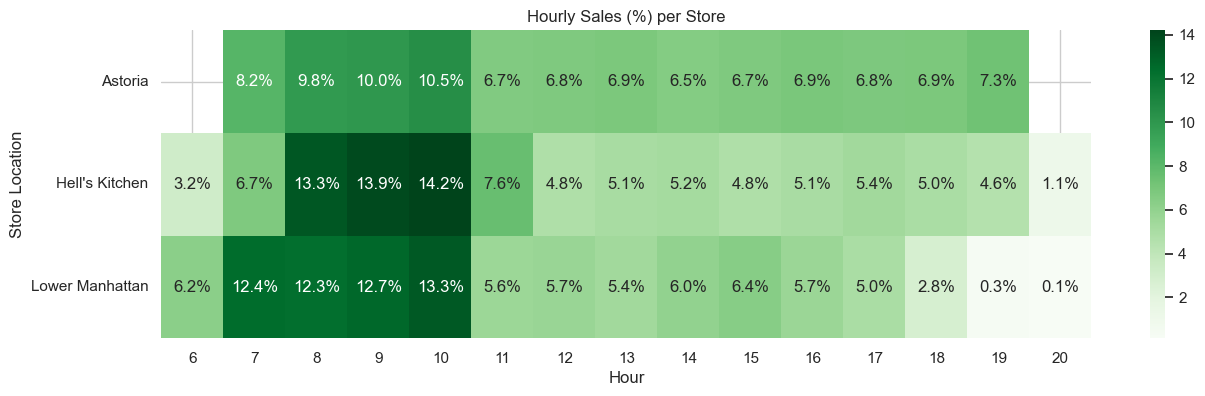

In [202]:
percent_data = lc_tm_sales2.div(lc_tm_sales2.sum(axis=1), axis=0) * 100
formatted_percent = percent_data.applymap(lambda x: f"{x:.1f}%" if pd.notnull(x) else "")
plt.figure(figsize=(15, 4))
sns.heatmap(percent_data, annot=formatted_percent, fmt="", cmap="Greens")
plt.title("Hourly Sales (%) per Store")
plt.xlabel("Hour")
plt.ylabel("Store Location")
plt.show()